In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Networkmodel import NetworkModel_org, HopField

In [2]:
30/1200

0.025

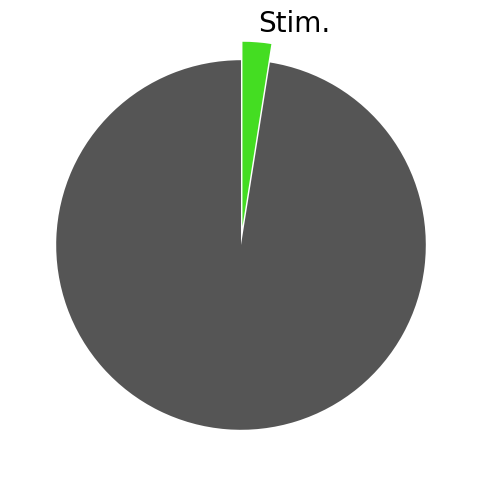

In [3]:
x = [30,1170]
label = ["Stim.", ""]
colors = ["#44dd22","#555555"]
plt.figure(figsize = (6,6))
plt.pie(x, labels=label, counterclock=False, startangle=90,
        explode=[0.1, 0], colors=colors,textprops={'fontsize': 20})
plt.savefig("./figure/pie_SZ.png", bbox_inches = "tight")

In [2]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.condition = np.array([1,2,3,4,5,6]) 
        self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [1], 5: [1], 6: [2]}
        self.initial = 1
        self.terminal = [4,5]
        self.prob = 0.5
        self.stmdict = {1: [1], 2: [2.1,2.2], 3: [3], 4:[4], 5:[5], 6: [6]}
        self.cortex_calc = [1,6]
        self.stmindex = {1:0, 2:int(np.random.rand() < self.prob), 3:0, 4:0, 5:0, 6:0}
        self.swblock = 30
        self.HFregister = dict()
        self.condact = {i:[] for i in self.condition}
        for key,val in self.stmdict.items():
            for s in val:
                tmp = np.zeros(self.nstm)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1  
                self.HFregister[s] = tmp

    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        swmode = np.mod(np.floor(count/self.swblock),2)
        tmp1 = sum([result[i]["infcond"] for i in range(len(result))], [])
        tmp2 = [result[i]["cond"] for i in range(len(result))]
        initial = 1 if np.mod(np.floor((count+1)/self.swblock),2) == 0 else 6
        if initial != self.initial:
            self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [initial], 5: [initial], 6: [2]}
            self.initial = None
        if self.stmindex[2] == 0:
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return int(4 in tmp2) if swmode == 0 else int(5 in tmp2)
        else:
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return int(5 in tmp2) if swmode == 0 else int(4 in tmp2)


In [3]:
allresult = dict()
x = 0

In [4]:
hp = NetworkModel(30,1170,300,1200,6)
result = []
HCprev = []
cond = None
for i in range(120):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
allresult[x] = result
x += 1

trial 0 stmindex 0 HCprev []
HCprev []
think 0-0 [243]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [171] 1-0
HC2HF [171] 1-0
pkup [171] 1-0
choose [1. 2.] [171 270]
stmremap [-1] [270] []
HCprev [[270]]
think 0-0 [155]
plan 2 [] 4
init 2 4
memo 2 0
HF2HC [24] 2.1-0
HC2HF [24] 2.1-0
pkup [24] 2.1-0
HC2HF [270] [2.1 0. ]
remove [1.  2.1 4. ] [171 270  24 185]
HF2HC [24] 2.1-0
HC2HF [24] 2.1-0
HCprev [array([185], dtype=int64)]
think 0-0 [147]
plan 4 [] 1
init 4 1
memo 4 0
HF2HC [99] 4-0
HC2HF [99] 4-0
pkup [99] 4-0
choose [4. 1.] [99 40]
HC2HF [185] 4-0
HF2HC [99] 4-0
HC2HF [99] 4-0
check trans [4.0] {}
['c:1', 'n:4.0', 'e:0.0', 'i:[1.0, 2.1]', 'p:[1.0, 2.0]', 'H:[171 270  24 185]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[185  99  40]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0']"]

trial 1 stmindex 1 HCprev 40
HCprev [array([40], dtype=int64)]
external stm 1
think 1-0 [171]
choose [1.  2.1 4. ] [171 270  24 185  99  40]
stmremap [24] [270] [24]
HCprev [[270]]


check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.47799375', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[ 40 171 270 155  47]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[171 270 155  47 180  62]', 'a:4-3', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '5-1', '1-2', '4-1', '1-3', '4-2', '1-4', '5-2', '2.2-6', '4-3']"]

trial 14 stmindex 0 HCprev 62
HCprev [array([62], dtype=int64)]
think 1-0 [171]
choose [1.  2.1 4. ] [171 270  24 185  99  40]
HC2HF [62] 1-0
HF2HC [171] 1-0
HC2HF [171] 1-0
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.47799375', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[ 62 171 270  24 185  99  40]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.47799375', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[ 62 171 270  24 185  99  40]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '5-1', '1-2', '4-1', '1-3', '4-2', '1-4', '5-2', '2.2-6', '4-3']"]

trial 15 stmindex 0 HCprev 40
HCprev [array([40], dtype=int64)]
t

HC2HF [181] [2.2 7. ]
remove [6.  2.2 5. ] [ 34 181 225 128]
HF2HC [225] 2.2-7
HC2HF [225] 2.2-7
HCprev [array([128], dtype=int64)]
think 0-0 [277]
plan 5 [] 6
init 5 6
memo 5 4
HF2HC [249] 5-4
HC2HF [249] 5-4
pkup [249] 5-4
choose [5. 6.] [249 111]
HC2HF [128] 5-4
HF2HC [249] 5-4
HC2HF [249] 5-4
check trans [5.0] {}
['c:6', 'n:5.0', 'e:0.0', 'i:[6.0, 2.2]', 'p:[6.0, 2.0]', 'H:[ 34 181 225 128]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.0', 'i:[5.0, 6.0]', 'p:[5.0, 6.0]', 'H:[128 249 111]', 'a:5-4', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '5-1', '1-2', '4-1', '1-3', '4-2', '1-4', '5-2', '2.2-6', '4-3', '5-3', '6-0', '2.2-7', '5-4']"]

trial 31 stmindex 1 HCprev 111
HCprev [array([111], dtype=int64)]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 0-0 [255]
plan 2 [5] 4
actremapping [ 34 181 225 128] [ 34 181 225 231]
choose [6.  2.2

choose [2.2 5. ] [96 29]
HC2HF [181] 2.2-12
HF2HC [96] 2.2-12
HC2HF [96] 2.2-12
HCprev [array([96], dtype=int64), array([29], dtype=int64)]
think 5-7 [112]
choose [5.] [112 249]
HC2HF [29] 5-7
HF2HC [112] 5-7
HC2HF [112] 5-7
check trans [2.2, 5.0] {(1.0, -1.0): 1.0}
['c:6', 'n:2.2', 'e:0.0', 'i:[6.0, 2.2]', 'p:[6.0, 2.2]', 'H:[102  34 181]', 'a:6-0', 'r:0']
['c:2', 'n:5.0', 'e:0.0', 'i:[2.2, 5.0]', 'p:[2.2, 5.0]', 'H:[ 34 181  96  29]', 'a:2.2-12', 'r:0']
['c:5', 'n:6', 'e:0.0', 'i:[5.0, 6.0]', 'p:[5.0]', 'H:[ 96  29 112 249]', 'a:5-7', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '1-2', '1-3', '1-4', '6-0', '6-1', '6-2', '5-6', '1-5', '2.1-11', '4-6', '2.2-12', '5-7', '6-3', '2.1-13', '5-8']"]

trial 40 stmindex 1 HCprev 249
HCprev [array([249], dtype=int64)]
external stm 6
think 0-0 [150]
plan 6 [] 2
init 6 2
memo 6 4
HF2HC [86] 6-4
HC2HF [86] 6-4
pkup [86] 6-4
choose [6. 2.] [ 86 124]
stmremap [-1] [124] []
HCprev [[124]]
think 0-0 [263]
plan 2 [] 5
init 2 5
memo 2 14
HF2HC [38] 

HF2HC [281] 2.1-19
HC2HF [281] 2.1-19
pkup [281] 2.1-19
HC2HF [181] [ 2.1 19. ]
remove [6.  2.1 5. ] [ 34 181 281 229]
HF2HC [281] 2.1-19
HC2HF [281] 2.1-19
HCprev [array([229], dtype=int64)]
think 0-0 [173]
plan 5 [] 6
init 5 6
memo 5 13
HF2HC [228] 5-13
HC2HF [228] 5-13
pkup [228] 5-13
choose [5. 6.] [228 205]
HC2HF [229] 5-13
HF2HC [228] 5-13
HC2HF [228] 5-13
check trans [5.0] {(1.0, -1.0): 1.0}
['c:6', 'n:5.0', 'e:0', 'i:[6.0, 2.1]', 'p:[6.0, 2.2, 4.0]', 'H:[127  34 181 281 229]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.0', 'i:[5.0, 6.0]', 'p:[5.0, 6.0]', 'H:[229 228 205]', 'a:5-13', 'r:1', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '1-2', '1-3', '1-4', '6-0', '6-1', '6-2', '1-5', '4-6', '6-3', '6-4', '4-7', '2.2-16', '2.2-17', '5-11', '5-12', '6-5', '2.1-18', '4-8', '2.1-19', '5-13']"]

trial 48 stmindex 0 HCprev 205
HCprev [array([205], dtype=int64)]
external stm 6
think 6-5 [31]
external stm 6
think 6-0 [34]
choose [6.  2.1 5. ] [ 34 181 281 229 228 205]
HC2HF [205] 6-0
HF2HC [34] 6-0

think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
external stm 6
think 0-0 [9]
choose [6. 4.] [ 34 181]
remove [6.] [ 34 181]
HC2HF [33] 6-0
HF2HC [34] 6-0
HC2HF [34] 6-0
HCprev [array([34], dtype=int64), array([181], dtype=int64)]
think 2.1-0 [24]
choose [2.1 4.  1. ] [ 24 185  99  40 171 270]
HC2HF [181] 2.1-0
HF2HC [24] 2.1-0
HC2HF [24] 2.1-0
check trans [1.0, 6.0, 2.1, 4.0, 1.0] {(1.0, -1.0): 1.0}
['c:6', 'n:2', 'e:0.0', 'i:[6.0, 2.0]', 'p:[6.0, 4.0]', 'H:[ 33  34 181]', 'a:6-0', 'r:0']
['c:2', 'n:4.0', 'e:0.0', 'i:[2.1, 4.0]', 'p:[2.1, 4.0, 1.0]', 'H:[ 34 181  24 185  99  40]', 'a:2.1-0', 'r:0']
['c:4', 'n:6', 'e:0.0', 'i:[2.1, 4.0]', 'p:[2.1, 4.0, 1.0]', 'H:[ 34 181  24 185  99  40]', 'a:4-0', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '1-2', '1-3', '1-4', '6-0', '1-5', '4-6', '4-7', '4-8', '6-6', '2.2-21', '6-7', '2.1-22', '4-9', '6-8', '2.2-23', '5-16', '2.1-24', '5-17']"]

trial 56 stmindex 0 HCprev 40
HCprev [array([

think 0-0 [284]
choose [6.  2.2] [ 34 181]
HC2HF [56] 6-0
HF2HC [34] 6-0
HC2HF [34] 6-0
HCprev [array([34], dtype=int64), array([181], dtype=int64)]
think 2.2-27 [139]
choose [2.2 4. ] [139 289 251 106]
HC2HF [181] 2.2-27
HF2HC [139] 2.2-27
HC2HF [139] 2.2-27
set NG [ 4. 11.] {(4.0, 11.0): 1.0}
check trans [6.0, 2.2, 4.0] {(4.0, 11.0): 1.0}
['c:6', 'n:2.2', 'e:0.0', 'i:[6.0, 2.2]', 'p:[6.0, 2.2]', 'H:[158  56  34 181]', 'a:6-0', 'r:0']
['c:2', 'n:4.0', 'e:0.15', 'i:[2.2, 4.0]', 'p:[2.2, 4.0]', 'H:[ 34 181 139 289 251 106]', 'a:2.2-27', 'r:0']
['c:4', 'n:1', 'e:0.15', 'i:[2.2, 4.0]', 'p:[2.2, 4.0]', 'H:[ 34 181 139 289 251 106]', 'a:4-11', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '1-1', '1-2', '1-3', '1-4', '6-0', '1-5', '6-6', '6-7', '6-8', '5-16', '5-17', '6-9', '6-10', '2.2-26', '5-18', '2.2-27', '4-11', '2.2-28', '5-19']"]

trial 64 stmindex 0 HCprev 106
HCprev [array([106], dtype=int64)]
external stm 1
think 1-0 [171]
choose [1.  2.1 4. ] [171 270  24 185  99  40]
HC2HF [106] 1-0
H

choose [2.2 5. ] [121  75  68 145]
HC2HF [73] 2.2-31
HF2HC [121] 2.2-31
HC2HF [121] 2.2-31
check trans [1.0, 2.2, 5.0, 1.0] {(4.0, 11.0): 1.0}
['c:1', 'n:2.2', 'e:0.0', 'i:[1.0, 2.2]', 'p:[1.0, 2.2]', 'H:[145 248  73]', 'a:1-7', 'r:0']
['c:2', 'n:5.0', 'e:0.5562946875', 'i:[2.2, 5.0]', 'p:[2.2, 5.0]', 'H:[248  73 121  75  68 145]', 'a:2.2-31', 'r:0']
['c:5', 'n:1', 'e:0.5562946875', 'i:[2.2, 5.0]', 'p:[2.2, 5.0]', 'H:[248  73 121  75  68 145]', 'a:5-21', 'r:1', "p:['1-0', '2.1-0', '4-0', '5-0', '6-0', '6-6', '6-7', '6-8', '6-9', '6-10', '4-11', '1-6', '1-7', '4-12', '1-8', '2.2-31', '5-21']"]

trial 74 stmindex 0 HCprev 145
HCprev [array([145], dtype=int64)]
think 1-7 [248]
choose [1.  2.2 5. ] [248  73 121  75  68 145]
stmremap [121] [73] [121]
HCprev [[73]]
think 0-0 [117]
plan 2 [] 5
init 2 5
memo 2 32
HF2HC [9] 2.1-32
HC2HF [9] 2.1-32
pkup [9] 2.1-32
HC2HF [73] [ 2.1 32. ]
remove [1.  2.1 5. ] [248  73   9 273]
HF2HC [9] 2.1-32
HC2HF [9] 2.1-32
HCprev [array([273], dtype=int64)]
th

memo 5 24
HF2HC [51] 5-24
HC2HF [51] 5-24
pkup [51] 5-24
choose [5. 1.] [ 51 143]
HC2HF [44] 5-24
HF2HC [51] 5-24
HC2HF [51] 5-24
check trans [5.0] {(4.0, 11.0): 1.0}
['c:1', 'n:2.1', 'e:0.15', 'i:[1.0, 2.1]', 'p:[1.0, 2.2, 5.0]', 'H:[145 248  73   9 259]', 'a:1-7', 'r:0']
['c:2', 'n:5.0', 'e:0.0', 'i:[2.1]', 'p:[2.1, 5.0]', 'H:[248  73   9 259 287  44]', 'a:2.1-34', 'r:0']
['c:5', 'n:1', 'e:0.0', 'i:[5.0, 1.0]', 'p:[5.0, 1.0]', 'H:[ 44  51 143]', 'a:5-24', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '6-0', '6-6', '6-7', '6-8', '6-9', '6-10', '4-11', '1-6', '1-7', '4-12', '1-8', '2.2-31', '5-21', '2.1-32', '5-22', '2.2-33', '5-23', '2.1-34', '5-24']"]

trial 87 stmindex 0 HCprev 143
HCprev [array([143], dtype=int64)]
external stm 1
think 1-0 [171]
choose [1.  2.2 5. ] [171 270 121  75  68 145]
stmremap [121] [270] [ 24 121]
HCprev [[24]]
think 2.1-0 [24]
HC2HF [24] [2.1 0. ]
remove [1.  2.1 4. ] [171 270  24 185  99  40]
HF2HC [24] 2.1-0
HC2HF [24] 2.1-0
tested ['4.0-0', '2.1-0', '1.0-0']

forget 5-21 [68] [75]
forget 5-25 [83] [179]
forget 5-24 [51] []
init 5 6
memo 5 26
HF2HC [64] 5-26
HC2HF [64] 5-26
pkup [64] 5-26
choose [5. 6.] [ 64 100]
HC2HF [197] 5-26
HF2HC [64] 5-26
HC2HF [64] 5-26
check trans [5.0] {(4.0, 0.0): 1.0, (4.0, 11.0): 0.7}
['c:6', 'n:5.0', 'e:0.15', 'i:[6.0, 2.1]', 'p:[6.0, 2.2, 4.0]', 'H:[214  34 181  50 197]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.0', 'i:[5.0, 6.0]', 'p:[5.0, 6.0]', 'H:[197  64 100]', 'a:5-26', 'r:1', "p:['1-0', '2.1-0', '4-0', '5-0', '6-0', '4-11', '1-6', '1-7', '4-12', '1-8', '2.2-31', '6-11', '4-13', '2.2-36', '4-14', '2.1-37', '4-15', '5-26']"]

trial 96 stmindex 1 HCprev 100
HCprev [array([100], dtype=int64)]
external stm 6
think 6-0 [34]
choose [6.  2.1 5. ] [ 34 181  50 197  64 100]
stmremap [50] [181] [ 50 165]
HCprev [[165]]
think 2.2-36 [165]
HC2HF [165] [ 2.2 36. ]
remove [6.  2.2 4. ] [ 34 181 165 191 269  30]
HF2HC [165] 2.2-36
HC2HF [165] 2.2-36
check trans [6.0, 2.2, 4.0] {(4.0, 0.0): 1.0, (4.0, 11.0): 0.7}
['c:6', 'n:

choose [1.  2.2 4. ] [171 270 121 288 199  39]
HC2HF [191] 1-0
HF2HC [171] 1-0
HC2HF [171] 1-0
check trans [6.0, 2.2, 1.0, 2.2, 4.0] {(4.0, 0.0): 1.0, (4.0, 11.0): 0.7}
['c:6', 'n:1.0', 'e:0.15', 'i:[6.0, 2.2, 1.0]', 'p:[6.0, 2.1, 5.0]', 'H:[213  34 181 165 191]', 'a:6-0', 'r:0']
['c:1', 'n:4.0', 'e:0.15', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.2, 4.0]', 'H:[ 34 181 165 191 171 270 121 288 199  39]', 'a:1-0', 'r:0']
['c:4', 'n:6', 'e:0.15', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.2, 4.0]', 'H:[ 34 181 165 191 171 270 121 288 199  39]', 'a:4-17', 'r:1', "p:['1-0', '2.1-0', '4-0', '5-0', '6-0', '1-6', '1-7', '1-8', '2.2-31', '6-11', '2.2-36', '2.1-37', '5-26', '6-12', '2.2-38', '4-16', '4-17', '6-13', '2.2-39', '5-27', '4-18']"]

trial 105 stmindex 1 HCprev 39
HCprev [array([39], dtype=int64)]
external stm 6
think 6-12 [96]
external stm 6
think 6-0 [34]
external stm 6
think 6-0 [34]
choose [6.  2.1 5. ] [ 34 181  50 197  64 100]
stmremap [50] [181] [ 50 165]
HCprev [[165]]
think 2.2-36 [165]
HC2HF [165

think 6-0 [34]
external stm 6
think 0-0 [144]
choose [6. 5.] [ 34 181]
remove [6.] [ 34 181]
HC2HF [53] 6-0
HF2HC [34] 6-0
HC2HF [34] 6-0
HCprev [array([34], dtype=int64), array([181], dtype=int64)]
think 2.2-31 [121]
choose [2.2 5. ] [121  75]
HC2HF [181] 2.2-31
HF2HC [121] 2.2-31
HC2HF [121] 2.2-31
HCprev [array([121], dtype=int64), array([75], dtype=int64)]
think 5-0 [28]
choose [5.] [28 84]
HC2HF [75] 5-0
HF2HC [28] 5-0
HC2HF [28] 5-0
set NG [ 1. -1.] {(1.0, -1.0): 1.0, (4.0, 0.0): 0.7, (4.0, 11.0): 0.48999999999999994}
check trans [2.2, 5.0] {(1.0, -1.0): 1.0, (4.0, 0.0): 0.7, (4.0, 11.0): 0.48999999999999994}
['c:6', 'n:2', 'e:0.0', 'i:[6.0, 2.0]', 'p:[6.0, 5.0]', 'H:[ 53  34 181]', 'a:6-0', 'r:0']
['c:2', 'n:5.0', 'e:0.0', 'i:[2.2, 5.0]', 'p:[2.2, 5.0]', 'H:[ 34 181 121  75]', 'a:2.2-31', 'r:0']
['c:5', 'n:1', 'e:0.23587499999999997', 'i:[5.0, 1.0]', 'p:[5.0]', 'H:[121  75  28  84]', 'a:5-0', 'r:0', "p:['1-0', '2.1-0', '4-0', '5-0', '6-0', '1-6', '1-7', '1-8', '2.2-31', '5-26', 

In [7]:
num = 40
trialnum = 120
allresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
odds = dict()
while x < num:
    print(x)
    hp = NetworkModel(30,1170,300,1200,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        allresult[x] = result
        odds[x] = hp.oddcounter
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    #if result[-1][-1]["rwd"] == 0:
    #    break
    x += 1
print(errcounter)
oddcounter = {k2: {k:v for k,v in odds[k2].items()} for k2 in odds.keys()}

0
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
actremapping [248  25  50 130] [248  25  50 155]
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
forget 2.1-7 [239] [286]
forget 2.2-1 [192] [289]
forget 2.1-4 [50] [25]
forget 2.1-3 [196] [289]
forget 2.2-5 [177] [83]
forget 2.2-6 [170] [25]
init 2 4
init 4 6
set NG [5. 1.] {(5.0, 1.0): 1.0}
init 6 2
init 2 5
init 5 6
actremapping [298 262] [298 136]
init 4 6
init 2 5
init 5 6
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
actremapping [263  49 259  36] [263  49 259 206]
forget 2.1-10 [33] [83]
forget 2.2-12 [61] [29]
forget 2.1-11 [238] []
forget 2.2-9 [259] [49]
forget 2.1-8 [269] []
forget 2.2-13 [48] [183]
init 2 5
init 5 6
init 2 5
forget 5-1 [32] [262]
forget 5-2 [119] []
forget 5-3 [292] []
forget 5-6 [134] []
forget 5-5 [211] [219]
forget 5-7 [20] [139]
forget 5-4 [94] [195]
init 5 6
init 2 5
init 5 6
actremappi

init 2 5
init 5 1
init 2 5
forget 5-3 [109] [249]
forget 5-5 [115] [237]
forget 5-1 [225] [142]
forget 5-4 [35] []
forget 5-6 [50] [199]
forget 5-7 [269] [11]
forget 5-2 [94] []
init 5 1
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
forget 2.2-10 [277] [276]
forget 2.2-11 [294] [123]
forget 2.2-8 [287] [263]
forget 2.2-12 [268] [150]
forget 2.1-9 [154] [150]
forget 2.1-13 [98] [231]
forget 2.1-14 [190] [205]
init 2 4
init 4 6
init 2 5
init 5 6
init 2 5
init 5 6
init 6 2
init 2 5
init 5 6
forget 4-4 [69] [158]
forget 4-2 [9] []
forget 4-5 [114] []
forget 4-1 [163] [70]
forget 4-7 [260] [21]
forget 4-3 [141] []
forget 4-6 [194] []
init 4 6
init 6 2
init 2 4
init 4 6
init 2 4
init 4 6
actremapping [112 234] [112 181]
init 4 6
init 6 2
init 2 5
init 5 6
forget 2.2-20 [293] [205]
forget 2.2-17 [112] [231]
forget 2.1-16 [128] [231]
forget 2.2-21 [27] [80]
forget 2.1-18 [209] [104]
forget 2.2-15 [77] []
forget 2.1-19 [66] [114]
init 2 5
init 5 6
init 6 2
ini

init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
forget 5-6 [43] [266]
forget 5-2 [238] []
forget 5-7 [170] []
forget 5-3 [78] []
forget 5-1 [142] [169]
forget 5-4 [136] [210]
forget 5-5 [145] [116]
init 5 1
forget 2.2-18 [107] [253]
forget 2.2-16 [85] [3]
forget 2.2-15 [227] [48]
forget 2.2-14 [220] [272]
forget 2.1-17 [257] [295]
init 2 4
init 4 1
set NG [5. 0.] {(5.0, 0.0): 1.0, (4.0, 0.0): 1.043}
forget 6-7 [275] []
forget 6-5 [134] []
forget 6-2 [206] []
forget 6-4 [242] []
forget 6-3 [287] []
forget 6-1 [98] [93]
forget 6-6 [296] []
init 6 2
init 2 5
init 5 6
set NG [ 4. 12.] {(5.0, 0.0): 0.7, (4.0, 0.0): 0.7300999999999999, (4.0, 12.0): 1.0}
init 6 2
init 2 4
init 4 6
actremapping [8 5] [  8 181]
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 4
forget 4-11 [52] [46]
forget 4-14 [282] []
forget 4-12 [160] [5]
forget 4-9 [168] [2]
forget 4-13 [135] [22]
forget 4-8 [74] [236]
forget 4-10 [114] []
init 4 6
forget 2.1-20 [199] [291]
forget 2.2-23 [250] [170]
forget 2.2-21 [117] [113

init 6 2
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
actremapping [226 252  19 205] [226 252  19 136]
init 5 6
init 2 4
forget 4-3 [266] []
forget 4-2 [180] []
forget 4-5 [127] []
forget 4-4 [47] [56]
forget 4-7 [139] []
forget 4-6 [153] []
forget 4-1 [283] [7]
init 4 6
init 6 2
init 2 5
init 5 6
forget 5-6 [285] [136]
forget 5-3 [118] [263]
forget 5-1 [32] [299]
forget 5-5 [66] [59]
forget 5-7 [134] [34]
forget 5-4 [189] []
forget 5-2 [61] [9]
init 5 1
init 1 2
init 2 4
init 4 1
forget 2.2-14 [179] [91]
forget 2.1-11 [121] [233]
forget 2.1-8 [141] [215]
forget 2.1-13 [50] []
init 2 4
init 4 1
set NG [4. 8.] {(4.0, 8.0): 1.0}
init 1 2
init 2 5
init 5 1
set NG [ 1. -1.] {(1.0, -1.0): 1.0, (4.0, 8.0): 0.7}
set NG [ 1. -1.] {(1.0, -1.0): 1.7, (4.0, 8.0): 0.48999999999999994}
set NG [ 1. -1.] {(1.0, -1.0): 2.19, (4.0, 8.0): 0.3429999999999999}
set NG [ 1. -1.] {(1.0, -1.0): 2.533, (4.0, 8.0): 0.24009999999999992}
set NG [ 1. -1.] {(1.0, -1.0): 2.7731, (4.0, 8.0): 0.16806999999999994}
init

set NG [5. 1.] {(5.0, 1.0): 1.0}
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
init 2 5
forget 5-7 [113] [123]
forget 5-5 [219] []
forget 5-3 [69] []
forget 5-2 [140] []
forget 5-6 [220] []
forget 5-1 [18] [293]
forget 5-4 [138] [262]
init 5 6
init 6 2
forget 2.2-12 [202] [209]
forget 2.2-9 [118] [121]
forget 2.1-11 [282] [25]
forget 2.2-10 [196] [242]
forget 2.1-8 [183] [61]
forget 2.2-13 [24] []
init 2 5
init 5 6
init 2 4
init 4 6
init 2 5
init 5 6
set NG [4. 0.] {(4.0, 0.0): 1.0, (5.0, 1.0): 0.7}
init 1 2
init 2 4
forget 4-5 [221] [255]
forget 4-1 [165] [119]
forget 4-2 [222] []
forget 4-3 [277] [215]
forget 4-4 [102] []
forget 4-7 [101] []
forget 4-6 [264] [170]
init 4 1
set NG [5. 0.] {(5.0, 0.0): 1.0, (4.0, 0.0): 0.7, (5.0, 1.0): 0.48999999999999994}
set NG [4. 0.] {(5.0, 0.0): 0.7, (4.0, 0.0): 1.0, (5.0, 1.0): 0.3429999999999999}
set NG [5. 0.] {(5.0, 0.0): 1.49, (4.0, 0.0): 0.7, (5.0, 1.0): 0.24009999999999992}
set NG [4. 0.] {(5.0, 0

forget 6-8 [289] []
forget 6-11 [150] []
forget 6-9 [58] []
forget 6-14 [99] []
forget 6-13 [11] []
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
20
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
actremapping [ 71 299] [ 71 139]
init 4 1
init 1 2
init 2 5
init 5 1
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
actremapping [207 138  39  48] [207 138  39  60]
init 4 6
forget 2.2-5 [39] [138]
forget 2.2-7 [296] [216]
forget 2.1-6 [100] [33]
forget 2.1-1 [215] [ 19 190]
forget 2.1-4 [55] [275]
forget 2.1-3 [267] [26]
init 2 5
init 5 6
init 2 4
init 4 6
set NG [5. 1.] {(5.0, 1.0): 1.0}
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
actremapping [181 274] [181 179]
forget 5-1 [270] [72]
forget 5-3 [206] []
forget 5-7 [53] []
forget 5-6 [184] [240]
forget 5-5 [127] [82]
forget 5-4 [228] []
forget 5-2 [114] []
init 5 6
actremapping [119  82] [119 204]
init 5

actremapping [264 118 158   4] [264 118 158   3]
init 4 1
set NG [ 6. -1.] {(4.0, 1.0): 0.48999999999999994, (6.0, -1.0): 1.0, (5.0, 3.0): 0.7}
set NG [ 6. -1.] {(4.0, 1.0): 0.3429999999999999, (6.0, -1.0): 1.7, (5.0, 3.0): 0.48999999999999994}
actremapping [295 135] [295 292]
init 4 1
forget 2.1-8 [194] []
forget 2.1-11 [104] [214]
forget 2.2-12 [254] [45]
forget 2.2-10 [89] [118]
forget 2.1-9 [158] [118]
forget 2.1-13 [279] [191]
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
init 2 4
init 4 6
init 6 2
init 2 5
forget 5-2 [261] []
forget 5-6 [216] []
forget 5-7 [72] [257]
forget 5-1 [102] [22]
forget 5-3 [299] [4]
forget 5-4 [103] [91]
forget 5-5 [266] []
init 5 6
init 2 4
init 4 6
actremapping [264 118 154 201] [264 118 154 165]
init 5 6
init 2 4
init 4 6
24
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [ 20 162 118  27] [ 20 162 118  11]
init 5 1
actremapping [ 80 136] [80  2]
init 4 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
actremapping [77 55] [ 77 101]
init 5 6
in

actremapping [102  29] [102 205]
init 5 1
init 1 2
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
forget 2.1-7 [161] [78]
forget 2.1-2 [144] [242]
forget 2.1-6 [209] [126]
forget 2.1-4 [197] [127]
forget 2.2-1 [102] [21]
forget 2.1-5 [111] [21]
init 2 4
init 4 6
init 2 5
init 5 6
init 2 4
init 4 1
init 2 5
init 5 1
33
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 1 2
forget 2.2-7 [198] [166]
forget 2.1-4 [285] [161]
forget 2.2-2 [144] [67]
forget 2.2-5 [256] [215]
forget 2.1-6 [249] [189]
forget 2.1-3 [4] [129]
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
actremapping [122 243 180 202] [122 243 180  69]
init 5 6
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
init 2 5
init 5 1
init 2 4
init 4 1
init 1 2
forget 2.2-8 [253] [267]
forget 2.2-11 [24] [187]
forget 2.2-13 [116] [189]
forget 2.1-12 [76] [215]
init 2 4
forget 4-4 [160] []
forge

set NG [5. 0.] {(1.0, -1.0): 0.7, (5.0, 0.0): 1.0}
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
36
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
actremapping [280 203 298 197] [280 203 298  34]
init 2 4
init 4 1
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 1 2
forget 2.2-5 [66] [151]
forget 2.1-4 [127] [185]
forget 2.1-1 [110] [48]
forget 2.2-3 [133] []
forget 2.2-6 [273] [155]
forget 2.1-7 [228] [235]
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 5 1
forget 1-7 [273] []
forget 1-2 [187] []
forget 1-3 [53] []
forget 1-4 [135] []
forget 1-6 [65] []
forget 1-1 [240] []
forget 1-5 [64] []
init 1 2
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
init 2 4
init 4 6
actremapping [195  54] [195  40]
init 5 6
init 6 2
init 2 4
forget 4-6 [295] [188]
forget 4-5 [292] []
forget 4-1 [156] [291]
forget 4-2 [283] []
forget 4-4 [246] [39]
forget 4-3 [212] []
forget 4-7 [277] []
init 4 6
init 6 2
fo

init 6 2
init 2 5
forget 5-15 [150] [9]
forget 5-21 [213] []
forget 5-18 [268] [192]
forget 5-20 [245] [63]
forget 5-19 [30] []
forget 5-16 [85] [223]
forget 5-17 [37] []
init 5 6
init 5 6
actremapping [189 118  69  35] [189 118  69 207]
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
forget 2.1-38 [31] [152]
forget 2.2-36 [266] [155]
forget 2.2-40 [262] [178]
forget 2.2-37 [222] [118]
forget 2.1-35 [69] [118]
forget 2.2-39 [96] [285]
init 2 5
init 5 6
init 2 4
init 4 6
forget 6-10 [189] []
forget 6-13 [0] []
forget 6-14 [177] []
forget 6-9 [188] []
forget 6-11 [131] []
forget 6-12 [130] []
forget 6-8 [77] []
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
forget 4-25 [153] [163]
forget 4-26 [84] []
forget 4-27 [288] [271]
forget 4-28 [198] [  8 134]
forget 4-24 [8] []
forget 4-22 [53] []
forget 4-23 [210] [199]
init 4 6
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
39
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 2 5

In [17]:
with open("./pkls/switch_prob_2cond_0.5_SZ.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)
    pickle.dump(oddcounter, f)

In [5]:
with open("./pkls/switch_prob_2cond_0.5_SZ.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
    oddcounter = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [6]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp
    if len(tmp) != trialnum:
        print(x, len(tmp))

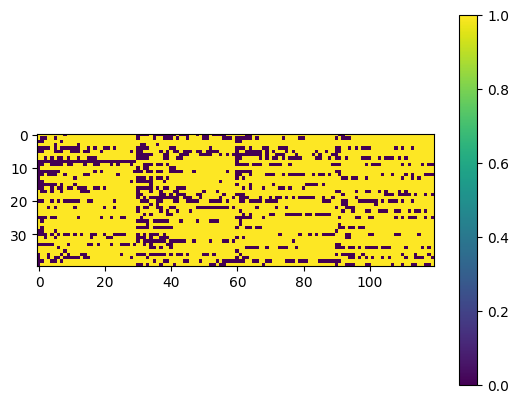

In [7]:
plt.imshow(rwdrate)
plt.colorbar()

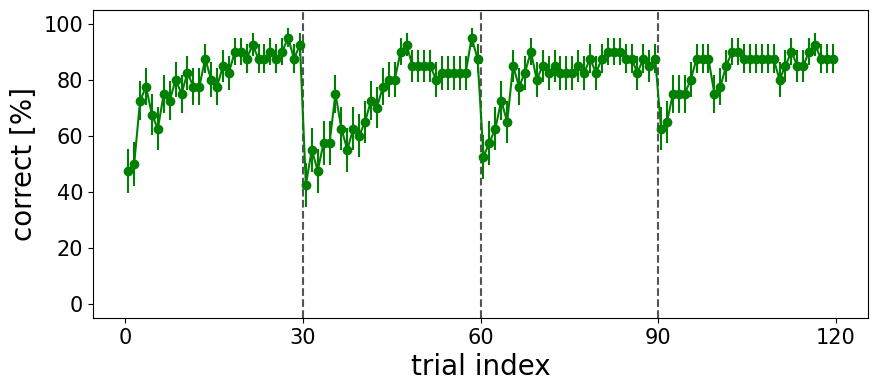

In [10]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_correct_SZ.png".format(hp.prob), bbox_inches = "tight")

In [8]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = []
    for r in range(len(allresult[x])):
        infcond = allresult[x][r][0]["infcond"]
        preinf = allresult[x][r][0]["preinf"]
        ln = int((len(allresult[x][r][-1]["HCtrans"])-1)/2)
        if set(infcond) != set(preinf):
            for y in range(np.min([len(infcond), len(preinf)])):
                if infcond[y] == preinf[y] and ln > 1:
                    ln -= 1
                else:
                    break
        tmp.append(ln)
    #tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

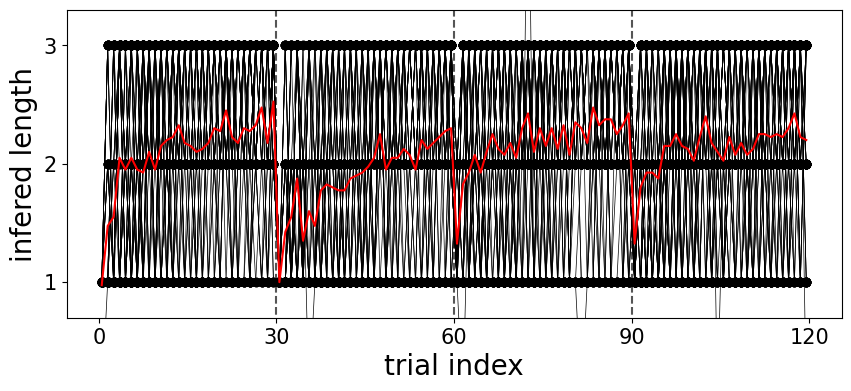

In [9]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,5], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.5)
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("infered length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks([1,2,3],fontsize = 15)
plt.ylim([.7,3.3])
plt.savefig("./figure/switch_prob_2cond_{}_inflen_SZ.png".format(hp.prob), bbox_inches = "tight")

In [8]:
oddsum = np.zeros((num,trialnum,4))*np.nan
for n in range(num):
    for t in range(trialnum):
        try:
            oddsum[n,t,:] = oddcounter[n][t]
            oddsum[n,t,3] += oddsum[n,t,1]
        except:
            print("error", n,t)

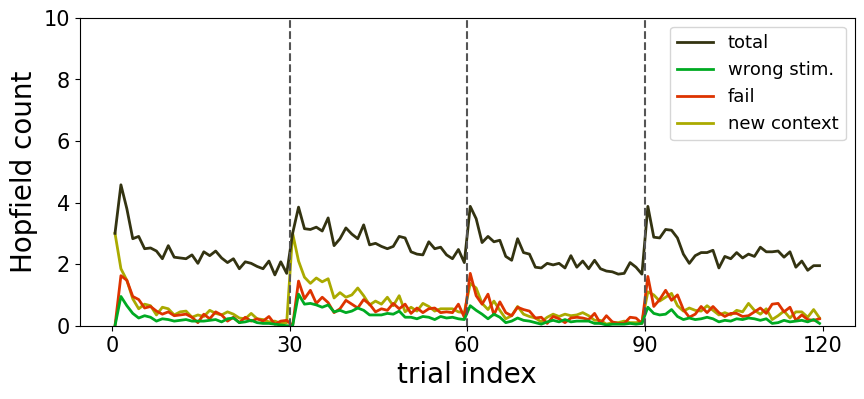

In [9]:
plt.figure(figsize = (10,4))
lbl = ["total","wrong stim.","fail","new context"]
clr = ["#333311","#00aa22","#dd3300","#aaaa00"]
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,12], "--",color = "#555555")
for i in range(4):
    h = plt.plot(np.nanmean(oddsum[:,:,i],axis = 0), label = lbl[i], linewidth = 2, color = clr[i],zorder = -i)

plt.legend(fontsize = 13)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("Hopfield count", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(np.arange(0,11,2),fontsize = 15) 
plt.ylim([0,10])
plt.savefig("./figure/switch_prob_2cond_{}_odds_SZ.png".format(0.5), bbox_inches = "tight")

In [15]:
choicerate = np.zeros((num,trialnum,2))*np.nan
for x in range(num):
    for r,res in enumerate(allresult[x]):
        rwd,cnd,init = res[-1]["rwd"], res[-1]["cond"], res[0]["cond"]
        if init == 1:
            choice = (cnd == 4)*rwd + (cnd == 5)*(1-rwd)
        else:
            choice = (cnd == 5)*rwd + (cnd == 4)*(1-rwd)
        if choice:
            choicerate[x,r,0] = (cnd == 4)
        else:
            choicerate[x,r,1] = (cnd == 4)

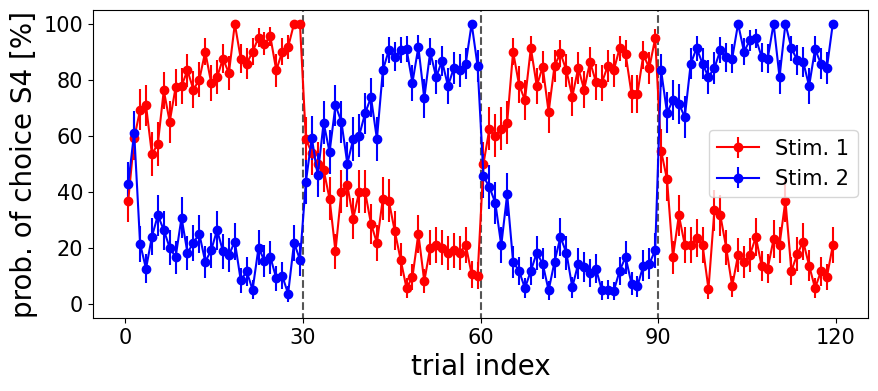

In [16]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-10,110], "--",color = "#555555")
h1 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,0],0)*100, \
                  100*np.nanstd(choicerate[:,:,0],0)/np.sqrt(num),fmt="ro-", label = "Stim. 1")
h2 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,1],0)*100, \
                  100*np.nanstd(choicerate[:,:,1],0)/np.sqrt(num),fmt="bo-", label = "Stim. 2")
plt.legend(fontsize=15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("prob. of choice S4 [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_choice_SZ.png".format(hp.prob), bbox_inches = "tight")